<a href="https://colab.research.google.com/github/kosarrara/minitarea2/blob/master/minitarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [1]:
import numpy as np

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.loadtxt(archivo)
datos.shape

# Inspecciona su forma y tamaño

(5298, 7)

## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


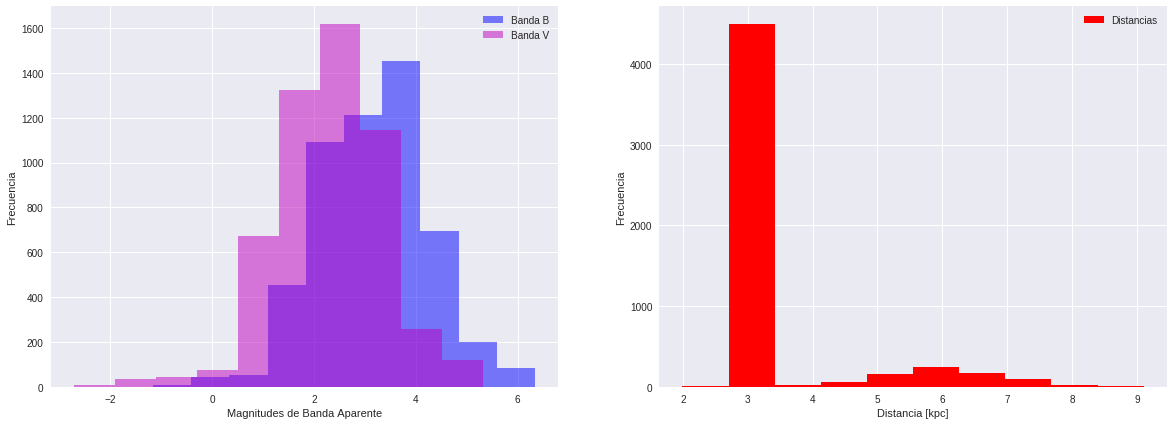

In [2]:
#Plotear histogramas de cada columna

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

fotometriaB=datos[:,0]
fotometriaV=datos[:,1]
fotometriaR=datos[:,2]
fotometriaI=datos[:,3]
temperaturaLog=datos[:,4]
masa=datos[:,5]
distancia=datos[:,6]


plt.figure(figsize=(20,7))
plt.subplot(121)
plt.hist(fotometriaB, color='b', label='Banda B', alpha=0.5)
plt.hist(fotometriaV, color='m', label='Banda V', alpha=0.5)
plt.xlabel("Magnitudes de Banda Aparente") 
plt.subplot(121).set_ylabel('Frecuencia')
plt.subplot(121).legend(loc="upper right")

plt.subplot(122)
plt.hist(distancia, color="r", label="Distancias", alpha=1)
plt.xlabel("Distancia [kpc]")
plt.subplot(122).set_ylabel("Frecuencia")
plt.subplot(122).legend(loc="upper right")

## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [3]:
#Filtrar por distancia
datos1=np.copy(datos)
datos1
distancia1=np.copy(distancia)
coordenadas=np.where(datos1[:,6]<3.5)
np.shape(coordenadas)
datosFiltrados=datos1[coordenadas,:]
datosFiltrados
tamanoOriginal=np.size(datos[:,1])
tamanoFiltrado=np.size(datosFiltrados[0,:,0])
print("El set original tenía "+str(tamanoOriginal)+ " estrellas, luego de filtrar quedaron " + str(tamanoFiltrado))

El set original tenía 5298 estrellas, luego de filtrar quedaron 4506


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
#Funcion mag_abs(mag, dist)

def mag_abs(mag_ap, dist):
  Final=np.array([])
  for k in range(np.size(mag_ap)):
    m=mag_ap[k]
    d=dist[k]
    M=m-5*np.log10(d)+5
    Final=np.append(Final,M)
  return Final

fotometriaBFiltrada=datosFiltrados[0,:,0]
fotometriaVFiltrada=datosFiltrados[0,:,1]
fotometriaRFiltrada=datosFiltrados[0,:,2]
fotometriaIFiltrada=datosFiltrados[0,:,3]
temperaturaLogFiltrada=datosFiltrados[0,:,4]
masaFiltrada=datosFiltrados[0,:,5]
distanciaFiltrada=datosFiltrados[0,:,6]

fotometriaBAbsoluta=mag_abs(fotometriaBFiltrada,distanciaFiltrada)
fotometriaVAbsoluta=mag_abs(fotometriaVFiltrada,distanciaFiltrada)
fotometriaRAbsoluta=mag_abs(fotometriaRFiltrada,distanciaFiltrada)
fotometriaIAbsoluta=mag_abs(fotometriaIFiltrada,distanciaFiltrada)

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

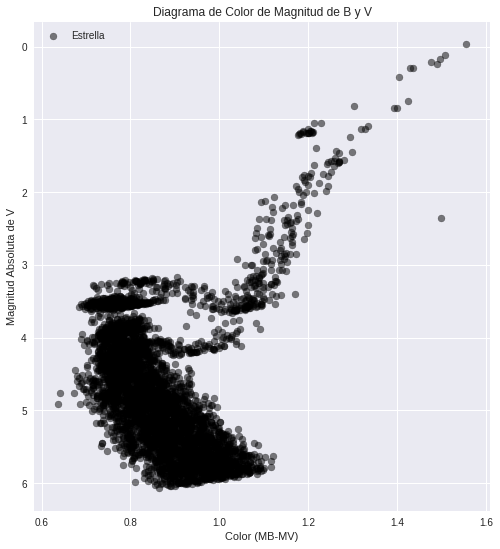

In [6]:
#Crear arrays MV y color
MV=fotometriaVAbsoluta
MB=fotometriaBAbsoluta
color=MB-MV



#plot cmd

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.scatter(color, MV, color="black", label="Estrella", alpha=0.5)
plt.xlabel("Color (MB-MV)")
plt.subplot(121).set_ylabel("Magnitud Absoluta de V")
plt.subplot(121).legend(loc="upper left")
plt.subplot(121).set_title("Diagrama de Color de Magnitud de B y V")
plt.subplot(121).invert_yaxis()


## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

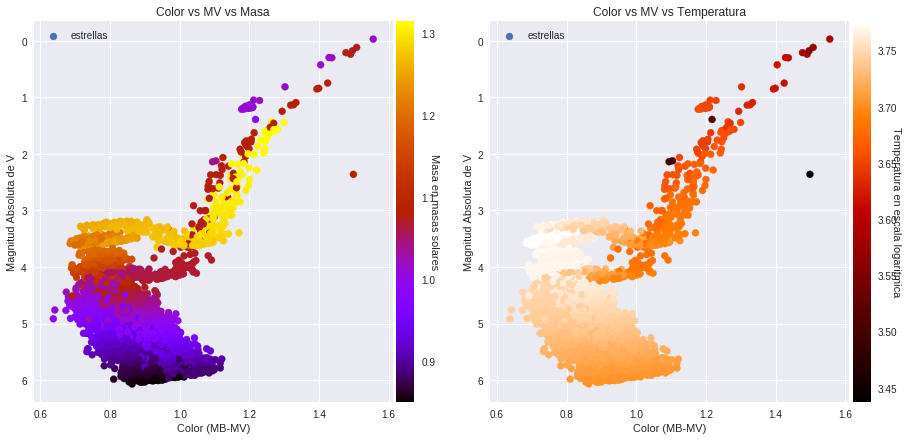

In [45]:
# plot cmd + masa / smd + temp
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

MB=fotometriaBAbsoluta
MV=fotometriaVAbsoluta
MI=fotometriaIAbsoluta
MR=fotometriaRAbsoluta
MasaF=masaFiltrada
DistanciaF=distanciaFiltrada
color=MB-MV
T=temperaturaLogFiltrada


fig, ax= plt.subplots(figsize=(15,7), ncols = 2)

mass= ax[0].scatter(color,MV, label="estrellas", c=MasaF, cmap="gnuplot")
ax[0].invert_yaxis()
ax[0].set_title("Color vs MV vs Masa")
ax[0].set_ylabel("Magnitud Absoluta de V")
ax[0].set_xlabel("Color (MB-MV)")
ax[0].legend(loc="upper left")
divider = make_axes_locatable(ax[0])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = plt.colorbar(mass, cax=cax1)
cbar2.set_label('Masa en masas solares', rotation=270)


temp=ax[1].scatter(color,MV,label="estrellas", c=T,cmap="gist_heat")
ax[1].invert_yaxis()
ax[1].set_title("Color vs MV vs Temperatura")
ax[1].set_ylabel("Magnitud Absoluta de V")
ax[1].set_xlabel("Color (MB-MV)")
ax[1].legend(loc="upper left")
divider = make_axes_locatable(ax[1])
cax2=divider.append_axes("right", size="5%", pad=0.05)
cbar1=plt.colorbar(temp, cax=cax2)
cbar1.set_label('Temperatura en escala logaritmica', rotation=270)


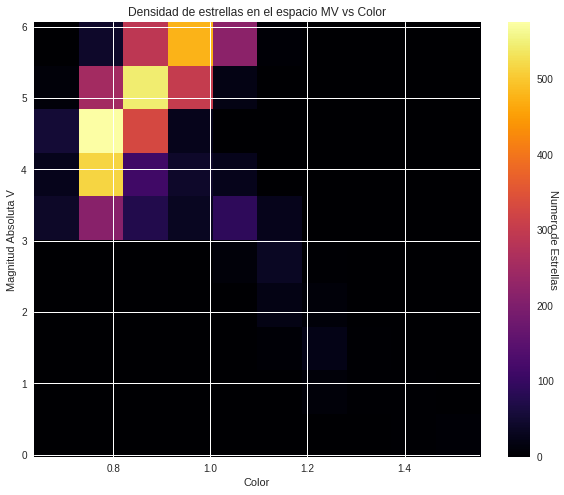

In [47]:
dx= plt.subplots(figsize=(10,8),ncols=1)
graf=dx[1].hist2d(color, MV, cmap="inferno")
dx[1].set_title("Densidad de estrellas en el espacio MV vs Color")
dx[1].set_ylabel("Magnitud Absoluta V")
dx[1].set_xlabel("Color")
cbar=plt.colorbar(graf[3])
cbar.set_label('Numero de Estrellas', rotation=270)
